In [1]:
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
import random
import math
import os
import cv2
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten,BatchNormalization,Dropout


In [2]:
plt.set_cmap('gray')

<Figure size 640x480 with 0 Axes>

# Loading the dataset: 

In [3]:
def display(images,a):
        m,n = 1, int(len(images)/a)
        for i in range(0,len(images),m*n):
            fig = plt.figure(figsize=(15,8))
            for j in range(m*n):
                fig.add_subplot(m,n,j+1)
                plt.imshow(images[i+j])
                plt.axis('off')
            plt.show()

In [4]:
import glob
data = glob.glob('dataset/Elyas MBarek/*.jpg')
data += glob.glob('dataset/Han Ye-seul/*.jpg')
data += glob.glob('dataset/Mahira Khan/*.jpg')
data += glob.glob('dataset/Ramy Youssef/*.jpg')
data += glob.glob('dataset/Riyad Mahrez/*.jpg')

In [5]:
print(f'This data has {len(data)} images')

This data has 1370 images


# Data Cleaning:

When using web scraping tools to download images, it’s common to encounter images that don’t meet your specific criteria. For our purposes, we only utilize images that clearly display the face and both eyes. This ensures that the images are suitable for facial recognition, analysis, or any other intended use cases requiring a full, unobstructed view of the face. Images that do not meet these standards are excluded to maintain the quality and relevance of our dataset. 

In [6]:
import mediapipe as mp

# Initialize MediaPipe Face Detection
mp_face_detection = mp.solutions.face_detection
face_detection = mp_face_detection.FaceDetection(min_detection_confidence=0.2)

In [7]:
# Detects if a face exists in the given image using MediaPipe Face Detection.
def detect_face_in_image(image_path):
    # Check if file exists
    if not os.path.exists(image_path):
        print(f"File not found: {image_path}")
        return None  # Return None to indicate no faces were detected or an error occurred
    
    # Read the image
    img = cv2.imread(image_path)
    
    # Check if image was loaded correctly
    if img is None:
        print(f"Failed to load image: {image_path}")
        return None
    
    # Convert the image to RGB (MediaPipe uses RGB)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Initialize MediaPipe face detection
    mp_face_detection = mp.solutions.face_detection
    face_detection = mp_face_detection.FaceDetection(model_selection=1, min_detection_confidence=0.5)
    
    # Perform face detection
    results = face_detection.process(img_rgb)
    
    # List to store cropped faces
    cropped_faces = []
    
    # Check if faces were detected
    if results.detections:
        for detection in results.detections:
            # Get bounding box coordinates
            bboxC = detection.location_data.relative_bounding_box
            ih, iw, _ = img.shape
            x_min = int(bboxC.xmin * iw)
            y_min = int(bboxC.ymin * ih)
            width = int(bboxC.width * iw)
            height = int(bboxC.height * ih)
            
            # Ensure the bounding box stays within image bounds
            x_min = max(0, x_min)
            y_min = max(0, y_min)
            x_max = min(iw, x_min + width)
            y_max = min(ih, y_min + height)
            
            # Crop the face
            cropped_face = img[y_min:y_max, x_min:x_max]
            cropped_faces.append(cropped_face)
    
    # Return the list of cropped faces
    return cropped_faces if cropped_faces else None

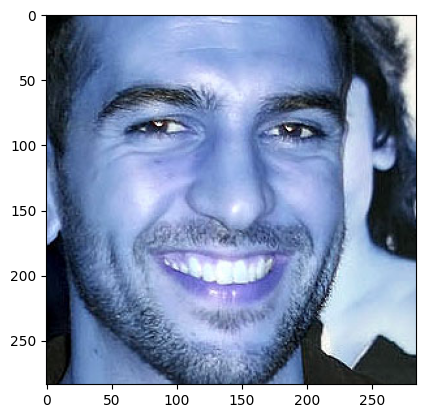

In [8]:
img = detect_face_in_image(data[130])
plt.imshow(img[0])
plt.show()

In [9]:
def save_faces(image_path, i, folder='cropped'):
    # Detect faces in the image
    faces = detect_face_in_image(image_path)
    
    # Ensure faces is not None or empty
    if faces is None or len(faces) == 0:
        print(f"No faces detected in {image_path}")
        return  # Exit the function if no faces are detected
    
    # Create the output folder if it doesn't exist
    if not os.path.exists(folder):
        os.makedirs(folder)
    
    # Extract label from the image path
    label = image_path.split('\\')[0].split('/')[-1]
    for face in faces:
        # Create a folder for each detected person
        person_folder = os.path.join(folder, label)
        os.makedirs(person_folder, exist_ok=True)
        
        # Save the face image in that person's folder
        face_filename = os.path.join(person_folder, f"face_{i+1}.jpg")
        cv2.imwrite(face_filename, face)
        print(f"Saved face {i+1} for {label} to {face_filename}")
        


In [ ]:
for i,image_path in enumerate(data):
    save_faces(image_path, i)        

Saved face 839 for Ramy Youssef to cropped\Ramy Youssef\face_839.jpg
Saved face 840 for Ramy Youssef to cropped\Ramy Youssef\face_840.jpg
Saved face 841 for Ramy Youssef to cropped\Ramy Youssef\face_841.jpg
Saved face 842 for Ramy Youssef to cropped\Ramy Youssef\face_842.jpg
Saved face 843 for Ramy Youssef to cropped\Ramy Youssef\face_843.jpg
Saved face 844 for Ramy Youssef to cropped\Ramy Youssef\face_844.jpg
Saved face 845 for Ramy Youssef to cropped\Ramy Youssef\face_845.jpg
Saved face 846 for Ramy Youssef to cropped\Ramy Youssef\face_846.jpg
Saved face 847 for Ramy Youssef to cropped\Ramy Youssef\face_847.jpg
Saved face 848 for Ramy Youssef to cropped\Ramy Youssef\face_848.jpg
Saved face 849 for Ramy Youssef to cropped\Ramy Youssef\face_849.jpg
Saved face 850 for Ramy Youssef to cropped\Ramy Youssef\face_850.jpg
Saved face 851 for Ramy Youssef to cropped\Ramy Youssef\face_851.jpg
Saved face 852 for Ramy Youssef to cropped\Ramy Youssef\face_852.jpg
Saved face 853 for Ramy Youssef to